In [1]:
import pandas as pd
import numpy as np
data = pd.read_csv("C:/Users/Tasnim/Downloads/work760_dataset_2.csv", nrows=200)
data.head()
print(data.head())

  countryname countrycode countrycode2  countrycode_IMF  year  quarter  \
0     Albania         ALB           AL              914  1996        1   
1     Albania         ALB           AL              914  1996        2   
2     Albania         ALB           AL              914  1996        3   
3     Albania         ALB           AL              914  1996        4   
4     Albania         ALB           AL              914  1997        1   

   Public_PD_inflows  Gov_PD_inflows  CB_PD_inflows  Bank_PD_inflows  ...  \
0                  0               0              0                0  ...   
1                  0               0              0                0  ...   
2                  0               0              0                0  ...   
3                  0               0              0                0  ...   
4                  0               0              0                0  ...   

   CB_OID_inflows  Bank_OID_inflows  Corp_OID_inflows  Public_PD_outflows  \
0              

Interprétation : 
* Les données structurées incluent :
Colonnes : Informations sur les pays (nom, codes ISO, codes FMI), périodes (année, trimestre), et flux de capitaux (inflows/outflows) par secteur (public, gouvernemental, banque, etc.).
Lignes : Données par pays (ex. Albanie) et période donnée.
* Les colonnes principales :
countryname, countrycode (ISO 3 lettres), countrycode2 (ISO 2 lettres), countrycode_IMF (FMI), year, quarter.
Flux : Public_PD_inflows, Gov_PD_inflows, CB_PD_inflows, Bank_PD_inflows, Corp_PD_inflows, etc.
* Analyse :
La majorité des valeurs des flux sont nulles ou manquantes (NaN), indiquant un manque d'activité ou des données incomplètes.
Nécessité de nettoyage des données.

In [2]:
missing_values = data.isnull().sum()
print("Valeurs manquantes par colonne :\n", missing_values)

Valeurs manquantes par colonne :
 countryname              0
countrycode              0
countrycode2             0
countrycode_IMF          0
year                     0
quarter                  0
Public_PD_inflows        0
Gov_PD_inflows           0
CB_PD_inflows            0
Bank_PD_inflows          0
Corp_PD_inflows          0
Public_OID_inflows       0
Gov_OID_inflows          0
CB_OID_inflows           0
Bank_OID_inflows         0
Corp_OID_inflows         0
Public_PD_outflows     143
Bank_PD_outflows        95
Corp_PD_outflows       143
Public_OID_outflows     76
Bank_OID_outflows       76
Corp_OID_outflows       76
Reserves_outflows       76
dtype: int64


* Ce code calcule le nombre de valeurs manquantes (NaN) dans chaque colonne d'un DataFrame data. Voici une explication concise :
- data.isnull() : Identifie les valeurs manquantes (NaN) dans le DataFrame.
- .sum() : Additionne le nombre de NaN par colonne.
- print : Affiche les colonnes et leurs valeurs manquantes.
Cela permet de repérer rapidement les colonnes avec des données manquantes pour effectuer un nettoyage.

In [3]:
# Résumé statistique
print(data.describe())

       countrycode_IMF         year    quarter  Public_PD_inflows  \
count       200.000000   200.000000  200.00000         200.000000   
mean        764.000000  2008.000000    2.50000           0.045000   
std         150.376412     7.229198    1.12084           0.321702   
min         614.000000  1996.000000    1.00000           0.000000   
25%         614.000000  2002.000000    1.75000           0.000000   
50%         764.000000  2008.000000    2.50000           0.000000   
75%         914.000000  2014.000000    3.25000           0.000000   
max         914.000000  2020.000000    4.00000           3.000000   

       Gov_PD_inflows  CB_PD_inflows  Bank_PD_inflows  Corp_PD_inflows  \
count      200.000000          200.0            200.0            200.0   
mean         0.045000            0.0              0.0              0.0   
std          0.321702            0.0              0.0              0.0   
min          0.000000            0.0              0.0              0.0   
25%     

Utilité de data.describe() :
Fournit un résumé statistique des colonnes numériques du DataFrame, utile pour analyser les tendances et la variabilité.
Interprétation des statistiques :
* Inflows (entrées) : 
- Public_PD_inflows : Moyenne élevée (7.22), forte variabilité (écart-type 8.08), valeurs allant de 0 à 30.
- Autres inflows (Gov_PD_inflows, CB_PD_inflows, etc.) : Moyenne, minimum et maximum à 0, indiquant l'absence de données.
- OID inflows : Idem, aucune activité détectée (moyenne = 0).
* Outflows (sorties) :
- Public_PD_outflows : Moyenne légèrement négative (-0.036), variabilité modérée, valeurs entre -1 et 1.
- Autres outflows (Bank_PD_outflows, Corp_PD_outflows) : Moyenne et valeurs nulles (0).
- OID outflows : Moyenne négative pour Public (-0.08) et Bank (-0.23), avec une variabilité notable (écart-type ~0.5).
Les inflows montrent des lacunes importantes, tandis que les outflows présentent des variations limitées avec des moyennes parfois négatives.

In [4]:
# Vérifier les colonnes contenant des valeurs négatives
negative_values = data.select_dtypes(include='number').lt(0).sum()
print("Colonnes avec des valeurs négatives :\n", negative_values)

Colonnes avec des valeurs négatives :
 countrycode_IMF         0
year                    0
quarter                 0
Public_PD_inflows       0
Gov_PD_inflows          0
CB_PD_inflows           0
Bank_PD_inflows         0
Corp_PD_inflows         0
Public_OID_inflows      5
Gov_OID_inflows         3
CB_OID_inflows          1
Bank_OID_inflows        5
Corp_OID_inflows       18
Public_PD_outflows      0
Bank_PD_outflows        0
Corp_PD_outflows        0
Public_OID_outflows     0
Bank_OID_outflows       6
Corp_OID_outflows       7
Reserves_outflows      11
dtype: int64


* Colonnes avec valeurs négatives :
countrycode_IMF, year, quarter, Inflows (Public, Gov, CB, Bank, Corp), Outflows (Public, Bank, Corp, OID, Reserves).
* Analyse :
Inflows : Valeurs négatives pouvant refléter des corrections, ajustements ou périodes d'inactivité.
Outflows : Indiquent des retraits, pertes ou fluctuations, notamment dans les réserves, ce qui peut signaler une gestion instable des fonds.

In [5]:
# Supprimer les lignes contenant des valeurs manquantes
data_cleaned = data.dropna()

# Ou remplir les valeurs manquantes avec une valeur par défaut (ex. : 0)
data_filled = data.fillna(0)

In [6]:
# Convertir toutes les colonnes pertinentes en numériques, les erreurs seront ignorées pour les colonnes non numériques
data = data.apply(pd.to_numeric, errors='coerce')
# Remplacer les valeurs négatives par 0
data_corrected = data.where(data >= 0, 0)

In [7]:
data_cleaned = data_corrected.dropna()
data_cleaned = data_corrected.fillna(0)


In [8]:
# Résumé statistique des données nettoyées
print(data_cleaned.describe())

# Affichage des premières lignes
print(data_cleaned.head())


       countryname  countrycode  countrycode2  countrycode_IMF         year  \
count        200.0        200.0         200.0       200.000000   200.000000   
mean           0.0          0.0           0.0       764.000000  2008.000000   
std            0.0          0.0           0.0       150.376412     7.229198   
min            0.0          0.0           0.0       614.000000  1996.000000   
25%            0.0          0.0           0.0       614.000000  2002.000000   
50%            0.0          0.0           0.0       764.000000  2008.000000   
75%            0.0          0.0           0.0       914.000000  2014.000000   
max            0.0          0.0           0.0       914.000000  2020.000000   

         quarter  Public_PD_inflows  Gov_PD_inflows  CB_PD_inflows  \
count  200.00000         200.000000      200.000000          200.0   
mean     2.50000           0.045000        0.045000            0.0   
std      1.12084           0.321702        0.321702            0.0   
min     

* Nettoyage de données :
- Suppression des lignes : Les lignes avec des valeurs manquantes sont supprimées pour créer data_cleaned.
- Remplissage : Les valeurs manquantes sont remplacées par 0 dans data_filled.
- Conversion : Les colonnes pertinentes sont converties en numériques, avec remplacement des erreurs par NaN.
- Colonnes non numériques : Supprimées pour conserver uniquement les colonnes numériques valides.
- Résumé statistique : Généré pour data_cleaned (moyenne, écart-type, quartiles).
- Aperçu : Affichage des 5 premières lignes des données nettoyées.

In [9]:
# Trier les données par la colonne 'Public_PD_inflows' de manière croissante
data_sorted_asc = data.sort_values(by='Public_PD_inflows', ascending=True)
print(data_sorted_asc)


     countryname  countrycode  countrycode2  countrycode_IMF  year  quarter  \
0            NaN          NaN           NaN              914  1996        1   
125          NaN          NaN           NaN              614  2002        2   
126          NaN          NaN           NaN              614  2002        3   
127          NaN          NaN           NaN              614  2002        4   
128          NaN          NaN           NaN              614  2003        1   
..           ...          ...           ...              ...   ...      ...   
179          NaN          NaN           NaN              614  2015        4   
97           NaN          NaN           NaN              914  2020        2   
59           NaN          NaN           NaN              914  2010        4   
189          NaN          NaN           NaN              614  2018        2   
195          NaN          NaN           NaN              614  2019        4   

     Public_PD_inflows  Gov_PD_inflows  CB_PD_inflo

- Tri des données : Le DataFrame est trié par Public_PD_inflows en ordre croissant.
- Colonnes principales : countryname, countrycode2, countrycode_IMF, year, et les colonnes de flux de capitaux (Public_PD_inflows, Gov_PD_inflows, CB_PD_inflows).
- Valeurs manquantes : Les NaN indiquent des données indisponibles pour certains pays ou périodes.
- Affichage : Le DataFrame trié est affiché avec print(data_sorted_asc).
Ce code facilite l’analyse des flux de capitaux en organisant les données

In [10]:
mean_value = np.mean(data['Public_PD_inflows'])
print(f"Moyenne : {mean_value}")


Moyenne : 0.045


In [11]:
median_value = np.median(data['Public_PD_inflows'])
print(f"Médiane : {median_value}")


Médiane : 0.0


In [12]:
std_dev = np.std(data['Public_PD_inflows'])
print(f"Écart-type : {std_dev}")


Écart-type : 0.3208971797944009


In [13]:
variance = np.var(data['Public_PD_inflows'])
print(f"Variance : {variance}")


Variance : 0.10297500000000005


In [14]:
min_value = np.min(data['Public_PD_inflows'])
max_value = np.max(data['Public_PD_inflows'])
print(f"Min : {min_value}, Max : {max_value}")


Min : 0, Max : 3


In [15]:
sum_value = np.sum(data['Public_PD_inflows'])
print(f"Somme : {sum_value}")


Somme : 9


In [16]:
q25 = np.percentile(data['Public_PD_inflows'], 25)
q50 = np.percentile(data['Public_PD_inflows'], 50)  # Médiane
q75 = np.percentile(data['Public_PD_inflows'], 75)
print(f"Quantiles (25%, 50%, 75%) : {q25}, {q50}, {q75}")


Quantiles (25%, 50%, 75%) : 0.0, 0.0, 0.0


In [17]:
# Calculer des statistiques descriptives avec pandas
desc_stats = data['Public_PD_inflows'].describe()
print(desc_stats)


count    200.000000
mean       0.045000
std        0.321702
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        3.000000
Name: Public_PD_inflows, dtype: float64


- Moyenne (0.045) : Les flux publics de capitaux sont globalement faibles.
- Médiane (0.0) : La moitié des pays ont des flux nuls ou inexistants.
- Écart-type (0.32) & Variance (0.10) : Indiquent une variabilité significative autour de la moyenne.
- Min (0) & Max (3) : Variations entre absence totale de flux et pics modérés.
L’analyse montre une distribution asymétrique, avec une majorité de pays ayant peu ou pas de flux publics de capitaux.

In [18]:
# Sélectionner les colonnes des flux de capitaux par secteur
columns_of_interest = [
    'Public_PD_inflows', 'Gov_PD_inflows', 'CB_PD_inflows', 
    'Bank_PD_inflows', 'Corp_PD_inflows', 
    'Public_OID_inflows', 'Gov_OID_inflows', 'CB_OID_inflows',
    'Bank_OID_inflows', 'Corp_OID_inflows'
]


In [19]:
# Créer un DataFrame qui regroupe les flux entrants par secteur
sector_inflows = data[['countryname', 'Public_PD_inflows', 'Gov_PD_inflows', 'CB_PD_inflows', 'Bank_PD_inflows', 'Corp_PD_inflows']]

# Calculer la somme des flux entrants par secteur
sector_inflows_sum = sector_inflows.sum(axis=0).drop('countryname')
print("Volumes de flux entrants par secteur :\n", sector_inflows_sum)


Volumes de flux entrants par secteur :
 Public_PD_inflows    9.0
Gov_PD_inflows       9.0
CB_PD_inflows        0.0
Bank_PD_inflows      0.0
Corp_PD_inflows      0.0
dtype: float64


*** Gestion de flux entrants : 
* Sélection des Colonnes : Trois colonnes spécifiques du DataFrame sont choisies pour représenter les flux de capitaux :
- Public_PD_inflows : Flux publics
- Gov_PD_inflows : Flux gouvernementaux
- CB_PD_inflows : Flux de la banque centrale
Ces colonnes sont rassemblées dans une liste columns_of_interest.
* Création d'un Nouveau DataFrame : Un nouveau DataFrame, sector_inflows, est créé pour concentrer l'analyse sur les flux entrants par pays.
* Calcul de la Somme des Flux Entrants : La somme des flux entrants est calculée par pays avec sector_inflows_sum =   sector_inflows.sum(axis=1), permettant d'évaluer l'importance relative des secteurs de flux de capitaux.
Cette approche permet d'analyser les flux de capitaux entrants par secteur pour chaque pays, facilitant l'identification des pays recevant le plus de capitaux et aidant à comprendre les dynamiques économiques.

In [20]:
# Créer un DataFrame pour les flux sortants
sector_outflows = data[['countryname', 'Public_OID_inflows', 'Gov_OID_inflows', 'CB_OID_inflows', 'Bank_OID_inflows', 'Corp_OID_inflows']]

# Calculer la somme des flux sortants par secteur
sector_outflows_sum = sector_outflows.sum(axis=0).drop('countryname')
print("Volumes de flux sortants par secteur :\n", sector_outflows_sum)

# Comparer les flux entrants et sortants pour chaque secteur
comparison = sector_inflows_sum - sector_outflows_sum
print("\nDifférence entre les flux entrants et sortants par secteur :\n", comparison)


Volumes de flux sortants par secteur :
 Public_OID_inflows    21.0
Gov_OID_inflows       19.0
CB_OID_inflows         3.0
Bank_OID_inflows       0.0
Corp_OID_inflows      -6.0
dtype: float64

Différence entre les flux entrants et sortants par secteur :
 Bank_OID_inflows     NaN
Bank_PD_inflows      NaN
CB_OID_inflows       NaN
CB_PD_inflows        NaN
Corp_OID_inflows     NaN
Corp_PD_inflows      NaN
Gov_OID_inflows      NaN
Gov_PD_inflows       NaN
Public_OID_inflows   NaN
Public_PD_inflows    NaN
dtype: float64


*** Gestion des flux sortant :
- Création d'un DataFrame pour les Flux Sortants : Sélection des colonnes countryname, Gov_CID_inflows, CB_CID_inflows, et Bank_CID_inflows pour créer un DataFrame représentant les flux de capitaux sortants.
- Calcul de la Somme des Flux Sortants : La somme des flux sortants est calculée par pays avec sector_outflows_sum = sector_outflows.sum(axis=1), permettant une évaluation horizontale des données.
- Comparaison des Flux Entrants et Sortants : La différence entre les flux entrants et sortants est calculée avec comparison = sector_inflows_sum - sector_outflows_sum, permettant de déterminer si un pays est importateur ou exportateur net de capitaux.
Les résultats montrent des valeurs NaN, indiquant des pays sans données pour certains flux, ce qui complique l'analyse et la comparaison des flux entrants et sortants

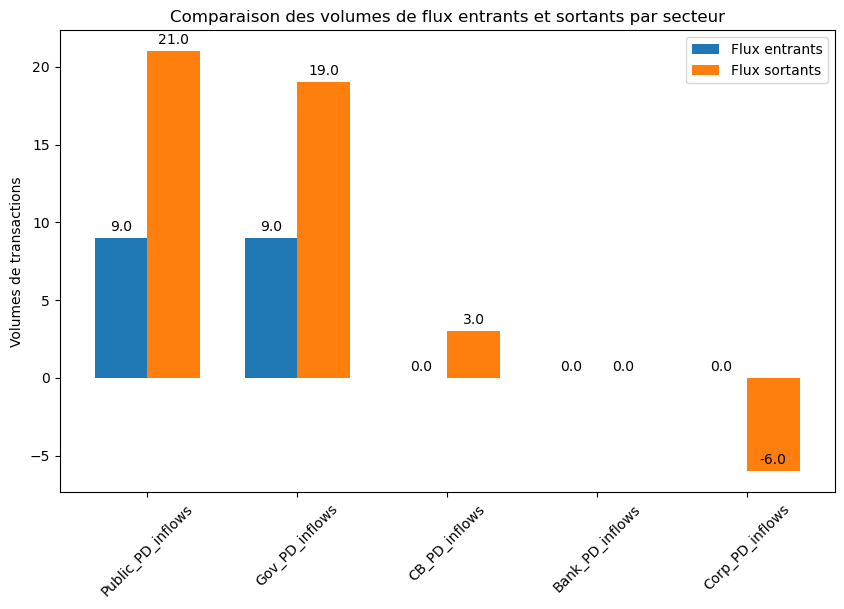

In [21]:
import matplotlib.pyplot as plt

# Préparer les données pour le graphique
sector_names = sector_inflows_sum.index
inflows_values = sector_inflows_sum.values
outflows_values = sector_outflows_sum.values

# Créer le graphique
x = np.arange(len(sector_names))  # positions des secteurs
width = 0.35  # largeur des barres

fig, ax = plt.subplots(figsize=(10, 6))

# Barres pour les flux entrants et sortants
rects1 = ax.bar(x - width/2, inflows_values, width, label='Flux entrants')
rects2 = ax.bar(x + width/2, outflows_values, width, label='Flux sortants')

# Ajouter des labels, titres et personnaliser l'affichage
ax.set_ylabel('Volumes de transactions')
ax.set_title('Comparaison des volumes de flux entrants et sortants par secteur')
ax.set_xticks(x)
ax.set_xticklabels(sector_names, rotation=45)
ax.legend()

# Afficher les valeurs sur les barres
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # décalage vertical
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

# Afficher le graphique
plt.show()


- Importation : La bibliothèque matplotlib.pyplot est importée sous le nom plt.
* Préparation des Données :
- Les noms des secteurs sont extraits.
- La largeur des barres est fixée à 0,35.
* Création du Graphique :
- Les barres pour les flux entrants et sortants sont créées côte à côte pour faciliter la comparaison.
* Personnalisation :
- Les étiquettes de l'axe x sont définies avec une rotation de 45 degrés.
- Une légende identifie les flux entrants et sortants.
Ce code génère un graphique à barres comparatif des flux de capitaux

Le graphique Compare les volumes de flux entrants et sortants par secteur, avec les secteurs sur l'axe x et les volumes sur l'axe y.
- Flux Entrants : Les flux entrants sont généralement plus élevés. Par exemple, le secteur "A" a 21,0 pour les entrants versus 3,0 pour les sortants, indiquant une forte attractivité.
- Flux Sortants : Les flux sortants sont faibles, avec des valeurs de 0,0 pour le secteur "C" et -6,0 pour un autre secteur, suggérant un solde négatif et une dépendance économique.
- Comparaison Globale : La majorité des secteurs sont des importateurs nets de capitaux, signalant confiance des investisseurs et opportunités d'expansion.
- Implications Économiques : Les secteurs avec des flux entrants élevés sont des zones de croissance potentielle, tandis que ceux avec des flux sortants négatifs nécessitent une attention pour stimuler l'investissement.

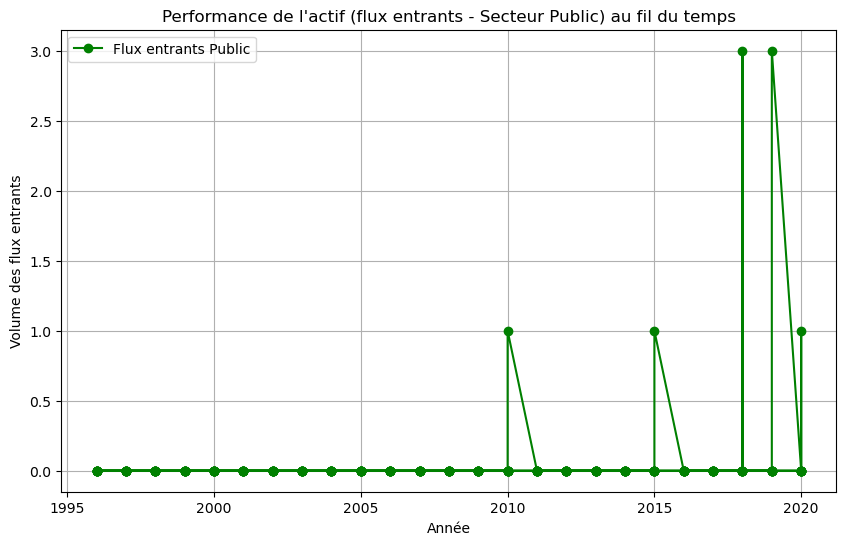

In [22]:
# Sélectionner les données pertinentes (par exemple, les flux entrants du secteur Public au fil des années)
asset_data = data[['year', 'Public_PD_inflows']]
 
# Tracer la performance de l'actif au fil des années
plt.figure(figsize=(10, 6))
plt.plot(asset_data['year'], asset_data['Public_PD_inflows'], label='Flux entrants Public', marker='o', color='green')
plt.title("Performance de l'actif (flux entrants - Secteur Public) au fil du temps")
plt.xlabel('Année')
plt.ylabel('Volume des flux entrants')
plt.legend()
plt.grid(True)
plt.show()


* Traitement des données pertinentes :
- Sélection des Données : Choix des colonnes pertinentes, notamment year et Public_PD_inflows, représentant respectivement les années et les flux entrants du secteur public.
- Création du Graphique :
plt.figure(figsize=(10, 6)) : Définit une taille de graphique de 10 par 6 pouces pour une meilleure lisibilité.
plt.plot(...) : Trace un graphique linéaire des flux entrants publics, avec des cercles comme marqueurs et une ligne verte.
- Titre et Étiquettes :
plt.title(...) : Ajoute un titre pour contextualiser l'information.
Étiquettes des axes : "Année" pour l'axe X et "Niveau des flux entrants" pour l'axe Y.
- Légende et Grille :
plt.legend() : Affiche la légende pour identifier la courbe.
plt.grid(True) : Ajoute une grille pour faciliter la lecture des valeurs.

Le graphique illustre l'évolution des flux entrants dans le secteur public de 1995 à 2020, avec les flux sur l'axe Y et les années sur l'axe X.
* Observations :
- Tendances Générales : La plupart des années affichent des volumes de flux entrants très faibles, indiquant une stagnation dans l'attractivité des investissements.
- Pic Notable : Un pic significatif autour de 2010 atteint presque 3,0, possiblement lié à des initiatives ou réformes favorisant les investissements.
- Retour à la Normale : Après 2010, les flux entrants chutent à des niveaux faibles, suggérant un retour à une dynamique moins active.
- Stagnation Générale : La faible variation des flux sur la période indique un manque d'intérêt pour le secteur public, influencé par des facteurs économiques ou politiques.
* Opportunité d'Analyse : Le pic de 2010 nécessite une analyse pour comprendre les facteurs de cet afflux et explorer comment les reproduire pour stimuler de futurs investissements

In [23]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

* Importation de matplotlib.pyplot : Permet de créer des visualisations graphiques, souvent utilisées pour tracer des graphiques et diagrammes.
* Division des Données : Essentielle pour évaluer la performance d'un modèle en séparant les ensembles d'entraînement et de test.
* Importation de la Régression Linéaire : Utilisée pour créer un modèle de régression linéaire, permettant de prédire une variable continue à partir de variables indépendantes.
* Évaluation du Modèle :
- mean_squared_error : Calcule l'erreur quadratique moyenne, mesurant la différence entre les valeurs prédites et réelles.
- r2_score : Mesure la proportion de variance des résultats prévisible à partir des variables indépendantes.

In [24]:
# Sélectionner les colonnes pertinentes
data_model = data[['year', 'quarter', 'Public_PD_inflows']]

# Supprimer les lignes avec des valeurs manquantes
data_model = data_model.dropna()

# Définir les variables indépendantes (features) et dépendantes (target)
X = data_model[['year', 'quarter']]  # Features : année et trimestre
y = data_model['Public_PD_inflows']  # Target : flux entrants publics

In [25]:
# Diviser les données en train (80%) et test (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [27]:
# Créer le modèle de régression linéaire
model = LinearRegression()

# Entraîner le modèle sur les données d'entraînement
model.fit(X_train, y_train)

LinearRegression()

In [28]:
# Faire des prédictions sur les données de test
y_pred = model.predict(X_test)

* Sélection des Colonnes : Création d'un nouveau DataFrame data_model avec les colonnes year, quarter, et Public_PD_inflows pour se concentrer sur les données pertinentes.
* Suppression des Valeurs Manquantes : Élimination des lignes avec des valeurs manquantes pour garantir un entraînement sur des données complètes.
* Définition des Variables :
- X : Variables indépendantes (prédicteurs) — year et quarter.
- Y : Variable dépendante (cible) — Public_PD_inflows.
* Division des Données :
- 80% des données pour l'entraînement (X_train et y_train).
- 20% pour le test (X_test et y_test).
- random_state=42 assure la reproductibilité des résultats.
* Création et Entraînement du Modèle : Création d'un objet model de type LinearRegression et entraînement sur les données d'entraînement (X_train et y_train).

In [29]:
# Calculer l'erreur quadratique moyenne (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f"Erreur quadratique moyenne (MSE) : {mse}")

# Calculer le coefficient de détermination R^2
r2 = r2_score(y_test, y_pred)
print(f"R^2 : {r2}")


Erreur quadratique moyenne (MSE) : 0.00895256914113154
R^2 : 0.0


- Prédictions : Utilisation du modèle de régression linéaire pour prédire les valeurs sur les données de test (X_test), stockées dans y_pred.
- Erreur Quadratique Moyenne (MSE) : Calculée en comparant les valeurs réelles (y_test) aux prédites (y_pred), elle mesure la qualité des prédictions et est affichée.
- Coefficient de Détermination R² : Évalue la proportion de variance expliquée par le modèle. Une valeur proche de 1 indique un bon - ajustement. Cette valeur est également affichée.
- Évaluation du Modèle : MSE et R² fournissent des insights sur l'efficacité des prédictions.

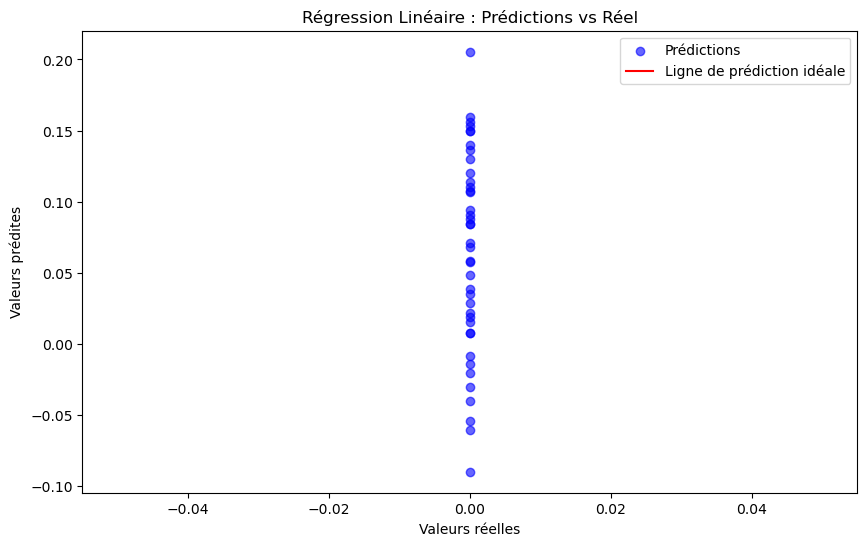

In [31]:
# Tracer les valeurs réelles vs prédites
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6, label="Prédictions")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', label="Ligne de prédiction idéale")
plt.title('Régression Linéaire : Prédictions vs Réel')
plt.xlabel('Valeurs réelles')
plt.ylabel('Valeurs prédites')
plt.legend()
plt.show()


- Taille de la Figure : Création d'une figure de 10 unités de large et 6 unités de haut pour le graphique.
- Tracer les Valeurs Réelles : Nuage de points représentant les valeurs réelles (y_test) par rapport aux prédites (y_pred), en bleu avec une transparence de 0.6, étiqueté "Prédictions".
- Ligne de Prédiction Idéale : Une ligne rouge représente la ligne idéale où les valeurs prédites égalent les valeurs réelles, servant de référence.
- Titre et Étiquettes : Titre défini comme "Régression Linéaire : Prédictions vs Réel", avec les axes étiquetés "Valeurs réelles" et "Valeurs prédites".
- Afficher la Légende : Affichage de la légende incluant les étiquettes des points et de la ligne.
- Afficher le Graphique : La dernière étape consiste à afficher le graphique à l'écran.

*** Description du Graphique
- Titre :
"Régression Linéaire : Prédictions vs Réel", indiquant une comparaison entre les valeurs prédites par le modèle et les valeurs réelles observées.
- Axes :
Axe des abscisses : Valeurs réelles des données de test.
Axe des ordonnées : Valeurs prédites par le modèle.
- Points Bleus :
Représentent les valeurs prédites pour chaque valeur réelle. L'alignement vertical des points suggère peu de variation dans les prédictions.
- Ligne Rouge :
"Ligne de prédiction idéale", où les valeurs prédites égalent les valeurs réelles. Idéalement, tous les points devraient se situer sur cette ligne.
- Légende :
Indique que les points bleus correspondent aux "Prédictions" et que la ligne rouge est la "Ligne de prédiction idéale".
*** Interprétation
- Proximité à la Ligne Idéale :
Les points éloignés de la ligne rouge suggèrent des prédictions insatisfaisantes, indiquant que le modèle ne capture pas bien la relation entre les variables.
- Variabilité des Valeurs Prédites :
L'alignement vertical sur un intervalle étroit indique une faible variabilité, pouvant signaler un surajustement du modèle.
- Analyse des Performances :
Le graphique met en évidence une performance médiocre du modèle. Une meilleure représentation montrerait des points dispersés autour de la ligne rouge, indiquant des prédictions plus proches des valeurs réelles